In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [34]:
medical_df = pd.read_csv('./medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

age_data = non_smoker_df["age"].to_numpy()
charges_data = non_smoker_df["charges"].to_numpy()

(array([18, 28, 33, ..., 18, 18, 21]),
 array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ]))

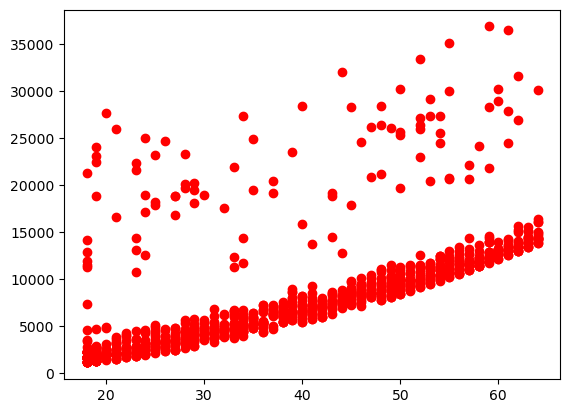

In [42]:
plt.plot(non_smoker_df["age"], non_smoker_df["charges"], "ro")

age_data, charges_data

In [82]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

hot_one_age = np.c_[np.ones((age_data.shape[0], 1)), age_data]

mnk_coeficients = normal_equations(hot_one_age, charges_data)

predictions = np.dot(hot_one_age, mnk_coeficients)

hot_one_age

(1064, 2) (2,)


array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

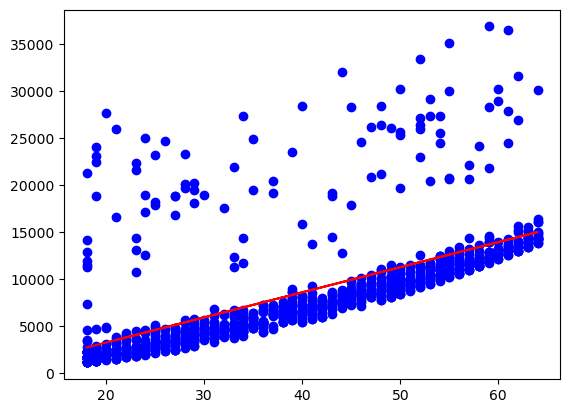

In [84]:
plt.plot(non_smoker_df["age"], non_smoker_df["charges"], "bo")
plt.plot(non_smoker_df["age"] , predictions, "r")

plt.show()

X: [18 28 33 ... 18 18 21]
y: [ 1725.5523   4449.462   21984.47061 ...  2205.9808   1629.8335
  2007.945  ]


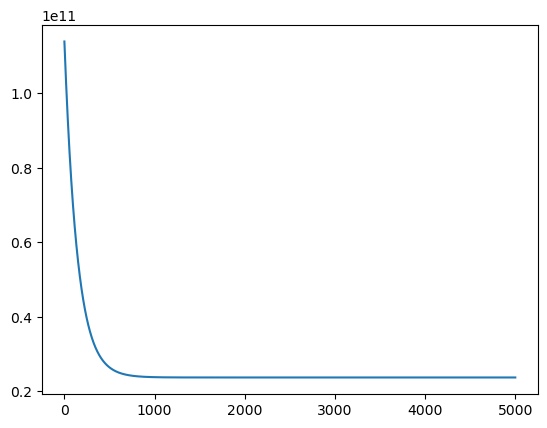

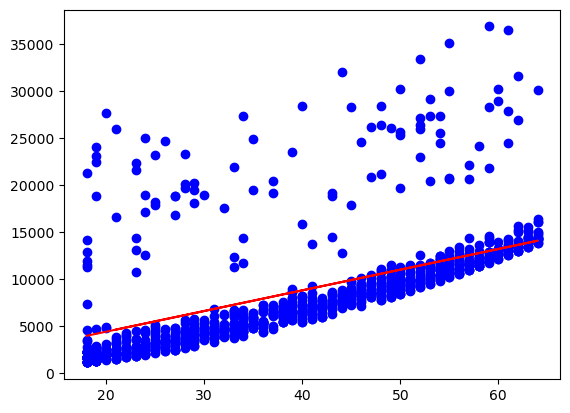

In [309]:
def full_batch_gradient_descent(X_input, y, lr=0.1, epochs=100):
    X = np.expand_dims(X_input, axis=1)
    
    print("X:",X[:, 0])
    print("y:",y)
    
    
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        
        # print("y_pred", y_pred)
        error = y_pred - y
        # print("error" ,sum(error**2))
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
        
    plt.plot(errors)
    plt.show()
    return m, b, errors

m, b, errors = full_batch_gradient_descent(age_data, charges_data, lr=0.000001, epochs=5000)

predicted_charges = m * age_data + b

plt.plot(non_smoker_df["age"], non_smoker_df["charges"], "bo")
plt.plot(non_smoker_df["age"] , predicted_charges, "r")

plt.show()

In [201]:
linReg = LinearRegression()

linReg.fit(np.expand_dims(age_data, axis=1), charges_data)

predictions_sklearn = linReg.predict(np.expand_dims(age_data, axis=1))

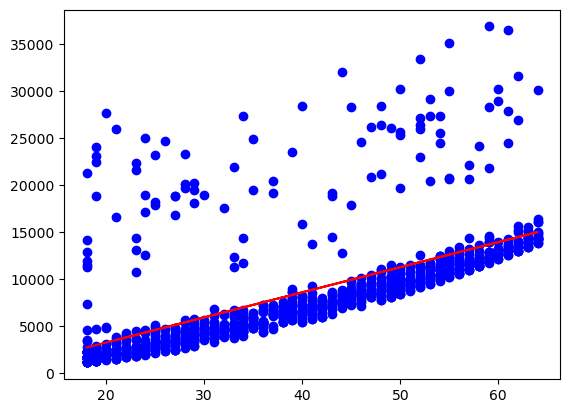

In [207]:
plt.plot(non_smoker_df["age"], non_smoker_df["charges"], "bo")
plt.plot(non_smoker_df["age"] , predictions_sklearn, "r")

plt.show()

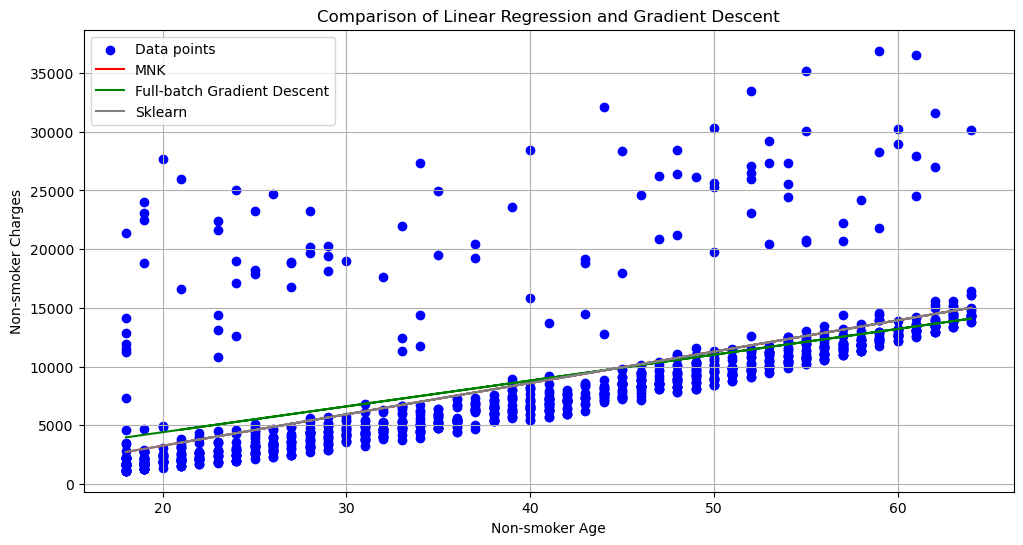

Mean Squared Error of MNK: 4662.505766636395
 Mean Absolute Error of MNK: 2580.5232282116117
 R2 Score of MNK: 0.3943171632425906



Mean Squared Error of Gradient Descent: 4715.4688688919205
 Mean Absolute Error of Gradient Descent: 2809.7519437865176
 R2 Score of Gradient Descent: 0.3804786646921914



Mean Squared Error of Sklearn: 4662.505766636395
 Mean Absolute Error of Sklearn: 2580.5232282116044
 R2 Score of Sklearn: 0.3943171632425906



In [303]:
# Results visualisation 
plt.figure(figsize=(12, 6))
plt.scatter(non_smoker_df["age"], non_smoker_df["charges"], color='blue', label='Data points')
plt.plot(non_smoker_df["age"], predictions, color='red', label='MNK')
plt.plot(non_smoker_df["age"], predicted_charges, color='green', label='Full-batch Gradient Descent')
plt.plot(non_smoker_df["age"], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Non-smoker Age')
plt.ylabel('Non-smoker Charges')
plt.legend()
plt.grid(True)
plt.show()

print(
    f"Mean Squared Error of MNK: {mean_squared_error(non_smoker_df['charges'], predictions, squared=False)}\n",
    f"Mean Absolute Error of MNK: {mean_absolute_error(non_smoker_df['charges'], predictions)}\n",
    f"R2 Score of MNK: {r2_score(non_smoker_df['charges'], predictions)}\n"
)

print("\n")

print(
    f"Mean Squared Error of Gradient Descent: {mean_squared_error(non_smoker_df['charges'], predicted_charges, squared=False)}\n",
    f"Mean Absolute Error of Gradient Descent: {mean_absolute_error(non_smoker_df['charges'], predicted_charges)}\n",
    f"R2 Score of Gradient Descent: {r2_score(non_smoker_df['charges'], predicted_charges)}\n"
)

print("\n")

print(
    f"Mean Squared Error of Sklearn: {mean_squared_error(non_smoker_df['charges'], predictions_sklearn , squared=False)}\n",
    f"Mean Absolute Error of Sklearn: {mean_absolute_error(non_smoker_df['charges'], predictions_sklearn)}\n",
    f"R2 Score of Sklearn: {r2_score(non_smoker_df['charges'], predictions_sklearn)}\n"
)

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Mean Squared Error of Sklearn: 0.0
 Mean Absolute Error of Sklearn: 0.0
 R2 Score of Sklearn: 1.0



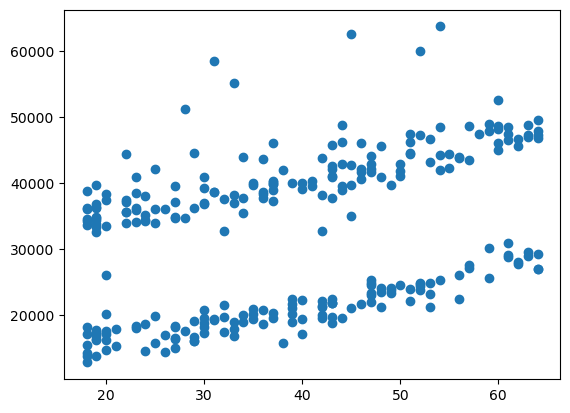

In [305]:
smoker_df = medical_df[medical_df.smoker == 'yes']

smoker_age = smoker_df["age"].to_numpy()
smoker_charges = smoker_df["charges"].to_numpy()

plt.plot(smoker_age, smoker_charges, "o")


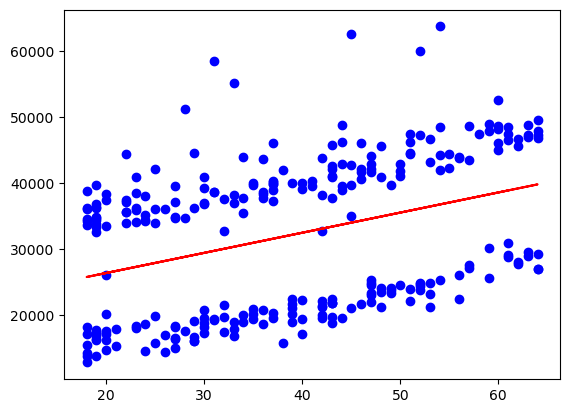

Mean Squared Error of Sklearn: 10711.00334810241
 Mean Absolute Error of Sklearn: 10097.800577858732
 R2 Score of Sklearn: 0.13558924096084068



In [307]:
linReg = LinearRegression()

linReg.fit(np.expand_dims(smoker_age, axis=1), smoker_charges)

smoker_predictions_sklearn = linReg.predict(np.expand_dims(smoker_age, axis=1))

plt.plot(smoker_df["age"], smoker_df["charges"], "bo")
plt.plot(smoker_df["age"] , smoker_predictions_sklearn, "r")

plt.show()

print(
    f"Mean Squared Error of Sklearn: {mean_squared_error(smoker_df['charges'], smoker_predictions_sklearn , squared=False)}\n",
    f"Mean Absolute Error of Sklearn: {mean_absolute_error(smoker_df['charges'], smoker_predictions_sklearn)}\n",
    f"R2 Score of Sklearn: {r2_score(smoker_df['charges'], smoker_predictions_sklearn)}\n"
)

In a case of smokers data since we have two groups of data, our prediction lands right between them, and the Error is pretty big. In this case i would not use this prediction since it predicts 2 diferend groups at the same time. but this line separeates them pretty good. Maybe i would use it to create two groups, and than use those 2 groups to find linear regerssion weights for them. 